In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

print("Library berhasil di-load.")

Library berhasil di-load.


In [23]:
file_path = 'Country-data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dibaca!")
    print(f"Dimensi Data: {df.shape[0]} Baris, {df.shape[1]} Kolom")
    display(df.head())
except FileNotFoundError:
    print("Error: File 'Country-data.csv' tidak ditemukan. Harap upload file terlebih dahulu.")

Dataset berhasil dibaca!
Dimensi Data: 167 Baris, 10 Kolom


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
print("--- Tipe Data ---")
df.info()

print("\n--- Cek Missing Values ---")
print(df.isnull().sum())

print("\n--- Statistik Deskriptif ---")
display(df.describe())

--- Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

--- Cek Missing Values ---
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

--- Statistik Deskriptif ---


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


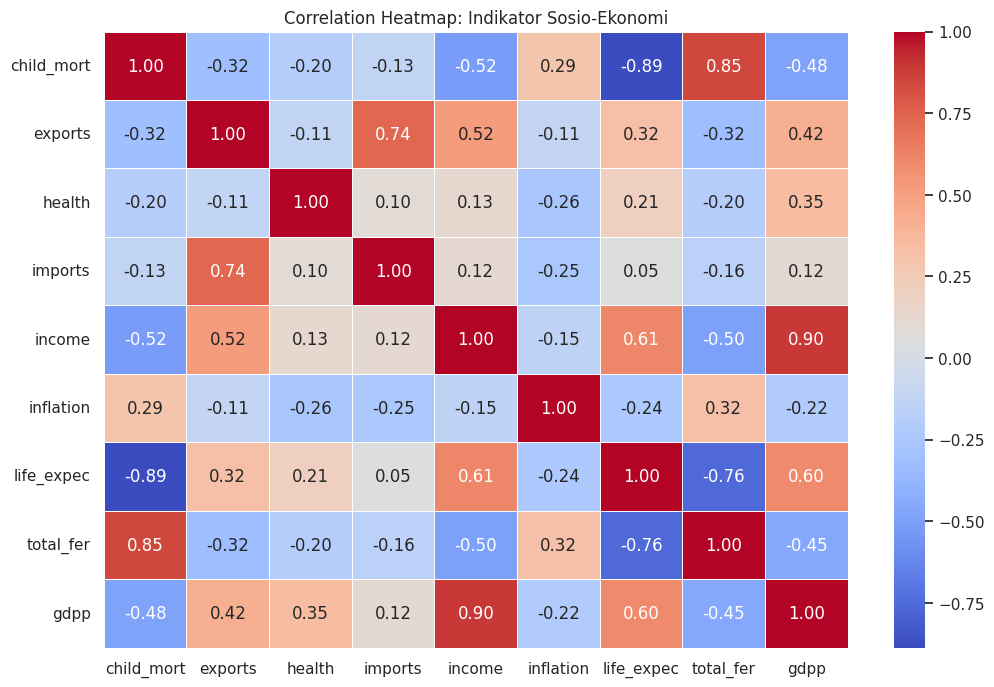

In [25]:
plt.figure(figsize=(12, 8))
# Drop kolom 'country' karena string tidak bisa dihitung korelasinya
correlation_matrix = df.drop('country', axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Indikator Sosio-Ekonomi')
plt.show()

In [26]:
# Memisahkan kolom identitas (Negara) dan data numerik
country_names = df['country']
data_mining = df.drop('country', axis=1)

# Scaling menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_mining)

# Konversi kembali ke DataFrame untuk kemudahan verifikasi
data_scaled_df = pd.DataFrame(data_scaled, columns=data_mining.columns)

print("Proses Scaling Selesai.")
display(data_scaled_df.head(3))

Proses Scaling Selesai.


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376


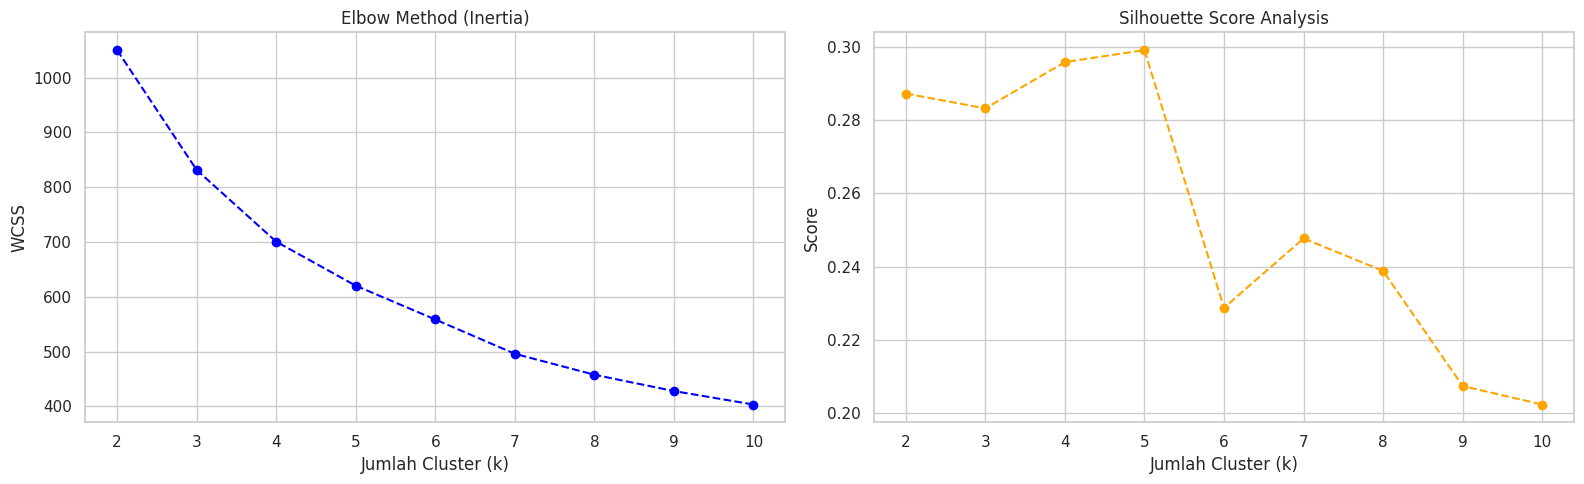

In [27]:
wcss = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, cluster_labels))

# Plotting Hasil Evaluasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Grafik Elbow Method
ax1.plot(range_n_clusters, wcss, marker='o', linestyle='--', color='blue')
ax1.set_title('Elbow Method (Inertia)')
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('WCSS')

# Grafik Silhouette Score
ax2.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
ax2.set_title('Silhouette Score Analysis')
ax2.set_xlabel('Jumlah Cluster (k)')
ax2.set_ylabel('Score')

plt.tight_layout()
plt.show()

In [28]:
k_optimal = 3

kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(data_scaled)

df['Cluster_ID'] = y_kmeans

print(f"Modeling selesai dengan {k_optimal} klaster.")
display(df[['country', 'Cluster_ID']].sample(5))

Modeling selesai dengan 3 klaster.


,country,Cluster_ID
161,Uzbekistan,2
33,Chile,2
41,Croatia,2
129,Senegal,1
37,"Congo, Dem. Rep.",1


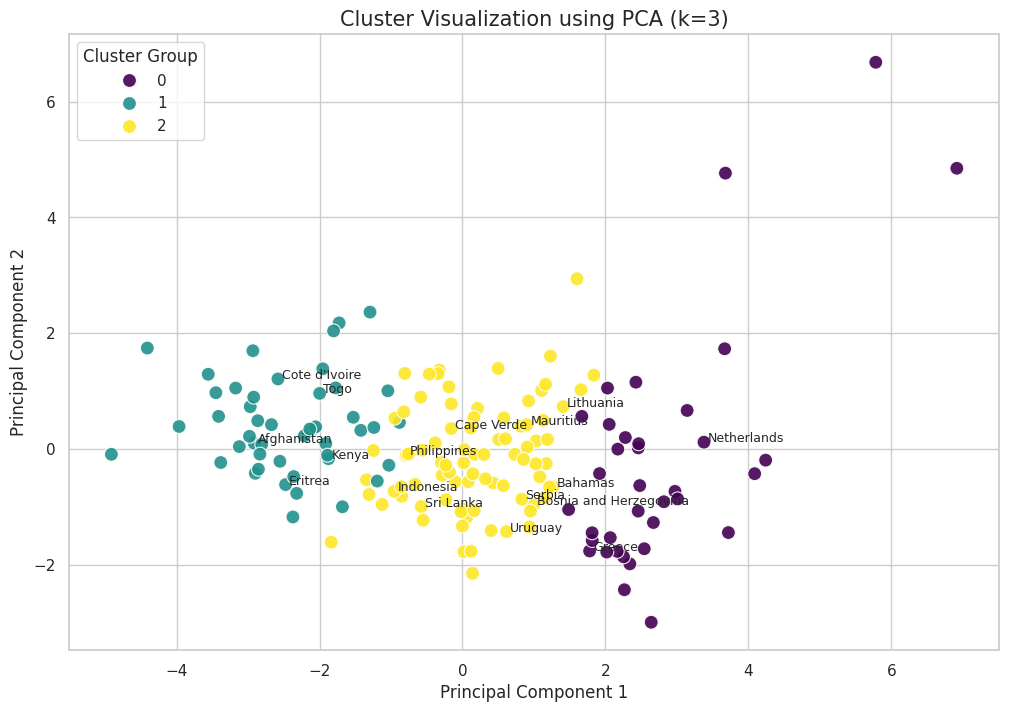

In [29]:
# Reduksi dimensi dari 9 fitur menjadi 2 Principal Components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
pca_df['Cluster_ID'] = y_kmeans
pca_df['Country'] = country_names.values

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_ID', data=pca_df, palette='viridis', s=100, alpha=0.9)

# Menambahkan label pada beberapa titik sampel
for i in range(0, pca_df.shape[0], 10):
    plt.text(pca_df.PC1[i]+0.05, pca_df.PC2[i], pca_df.Country[i], fontsize=9)

plt.title(f'Cluster Visualization using PCA (k={k_optimal})', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Group')
plt.grid(True)
plt.show()

Rata-rata Indikator per Klaster:


,gdpp,income,child_mort,life_expec
Cluster_ID,,,,
1,1922.382979,3942.404255,92.961702,59.187234
2,6486.452381,12305.595238,21.927381,72.814286
0,42494.444444,45672.222222,5.000000,80.127778


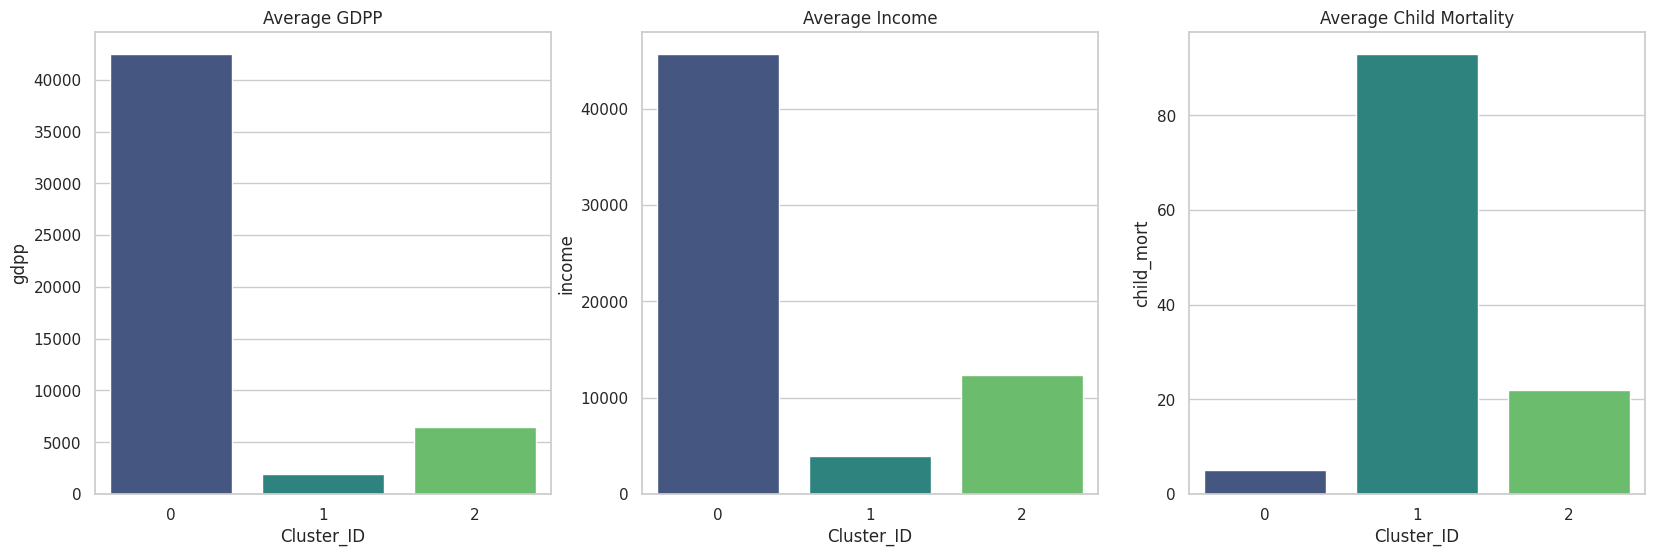

In [30]:
cluster_profile = df.drop('country', axis=1).groupby('Cluster_ID').mean()

print("Rata-rata Indikator per Klaster:")
display(cluster_profile[['gdpp', 'income', 'child_mort', 'life_expec']].sort_values(by='gdpp'))

# Visualisasi Perbandingan
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x=cluster_profile.index, y=cluster_profile['gdpp'], ax=axes[0], palette='viridis')
axes[0].set_title('Average GDPP')

sns.barplot(x=cluster_profile.index, y=cluster_profile['income'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Income')

sns.barplot(x=cluster_profile.index, y=cluster_profile['child_mort'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Child Mortality')

plt.show()

In [32]:
df[['country', 'Cluster_ID']].to_csv('hasil_cluster.csv', index=False)
print("File 'hasil_cluster.csv' berhasil dibuat.")

File 'hasil_cluster.csv' berhasil dibuat.
